<a href="https://colab.research.google.com/github/True-Duku/Kakaoku/blob/main/Classification_De_Donn%C3%A9es_Sensorielles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation de la bibliothèque Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importation du fichier chocolat et affichage des premieres lignes
df = pd.read_csv('chocolate.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [3]:
# Statistique descriptives rapide
df.describe()

,REF,Review\nDate,Rating
count,1500.000000,1500.000000,1500.000000
mean,1036.881333,2012.326000,3.183167
std,554.693828,2.933734,0.484319
min,5.000000,2006.000000,1.000000
25%,572.000000,2010.000000,2.750000
50%,1071.000000,2013.000000,3.250000
75%,1503.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [4]:
# Vérification des valeurs manquantes
df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [5]:
# Remplacement des valeurs manquantes pour Bean\nType et Broad Bean\nOrigin

df['Bean\nType'].fillna(df['Bean\nType'].mode()[0], inplace=True)
df['Broad Bean\nOrigin'].fillna(df['Broad Bean\nOrigin'].mode()[0], inplace=True)

In [6]:
# Vérification
df.isna().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

In [7]:
# Vérification
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [8]:
# Vérification des valeur présentes dans les colonnes Rating et Cocoa
df['Rating'].unique(),df['Cocoa\nPercent'].unique()

(array([4.  , 3.25, 3.5 , 3.  , 2.75, 3.75, 2.5 , 2.  , 2.25, 5.  , 1.5 ,
        1.  , 1.75]),
 array(['64%', '80%', '70%', '65%', '68%', '73%', '72%', '74%', '60%',
        '75%', '55%', '67%', '63%', '99%', '77%', '72.5%', '62%', '85%',
        '78%', '82%', '53%', '66%', '88%', '100%', '83%', '69%', '71%',
        '76%', '61%', '57%', '58%', '90%', '91%', '86%', '84%', '42%',
        '46%', '89%', '73.5%', '60.5%', '81%', '79%', '56%', '50%', '87%'],
       dtype=object))

In [9]:
# prédiction des notes par rapport au pourcentage du chocolat en utilisant unesimple regression linéaire
# Data visualisation, affichage de la distribution des variables en séparant les variables numériques des catégorielles
cat_df = df.select_dtypes(include='object').columns
num_df = df.select_dtypes(include='number').columns

In [10]:
# Vérificattion cat_df
df.loc[:,cat_df].head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,64%,France,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",80%,Switzerland,Blend,
2,Potomac,Upala w/ nibs,70%,U.S.A.,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",70%,U.S.A.,,Nicaragua
4,Carlotta Chocolat,Cesar,65%,Colombia,CCN51,Colombia


In [11]:
# Vérification num_df
df.loc[:,num_df].head()

,REF,Review\nDate,Rating
0,129,2007,4.00
1,1442,2014,3.25
2,647,2011,3.50
3,1538,2015,3.50
4,1888,2016,3.50


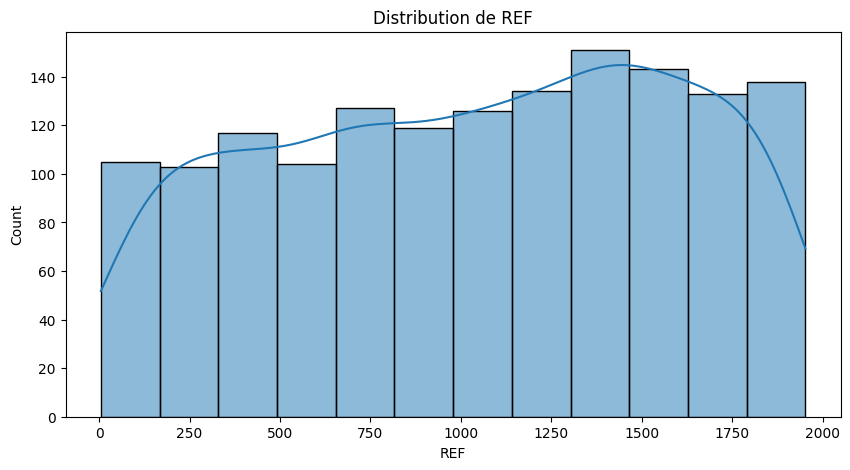

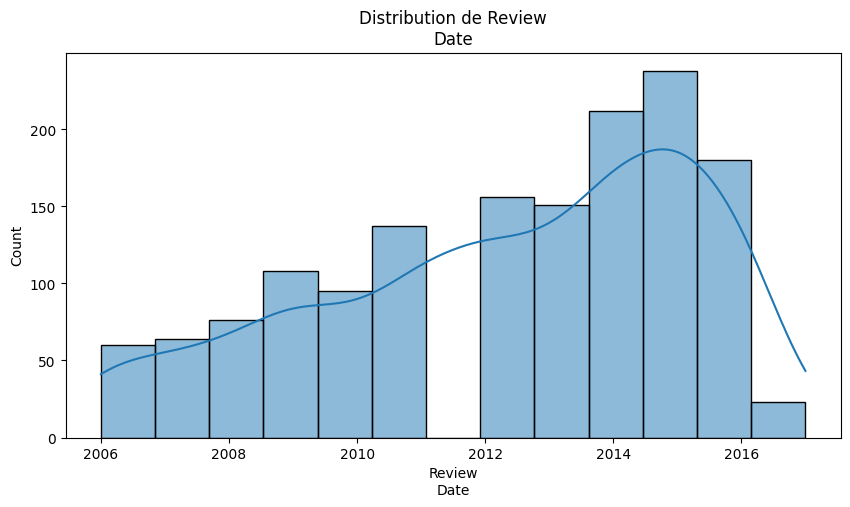

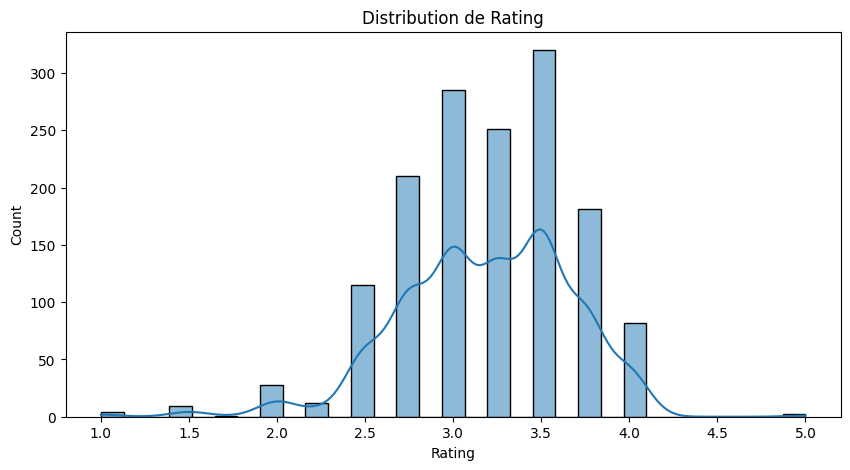

In [12]:
# Affichage de la distribution des valeurs numériques
for column in df.columns:
    # Vérifier si la colonne est numérique
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True)
        plt.title('Distribution de ' + column)
        plt.show()

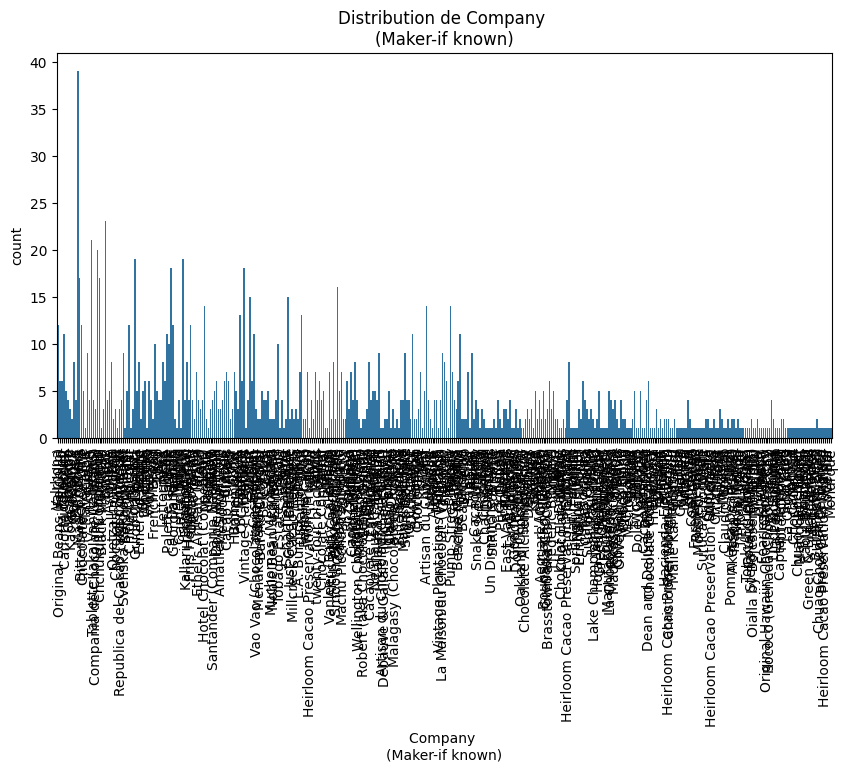

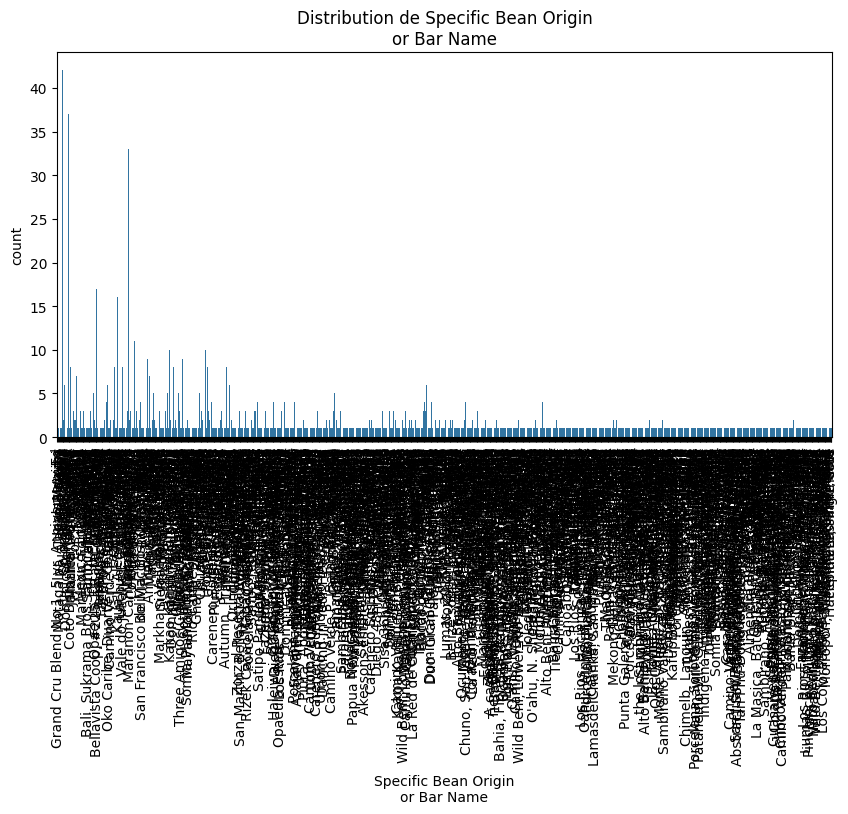

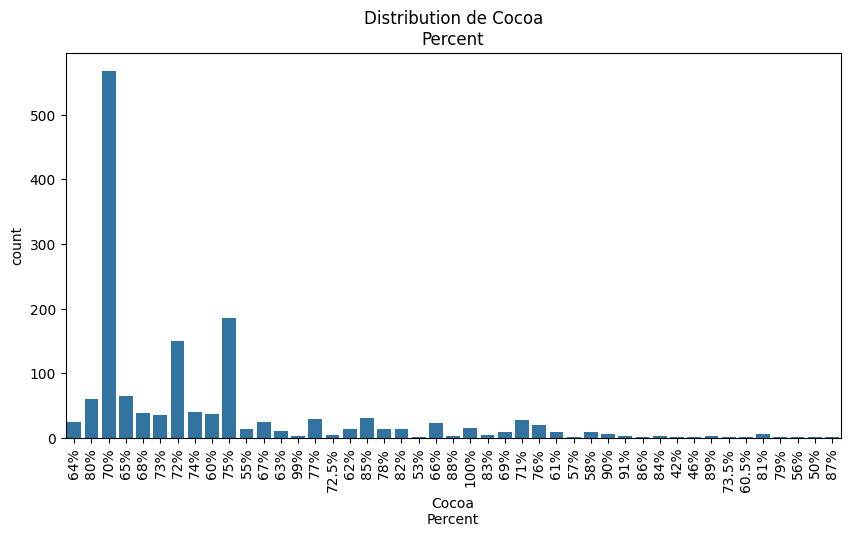

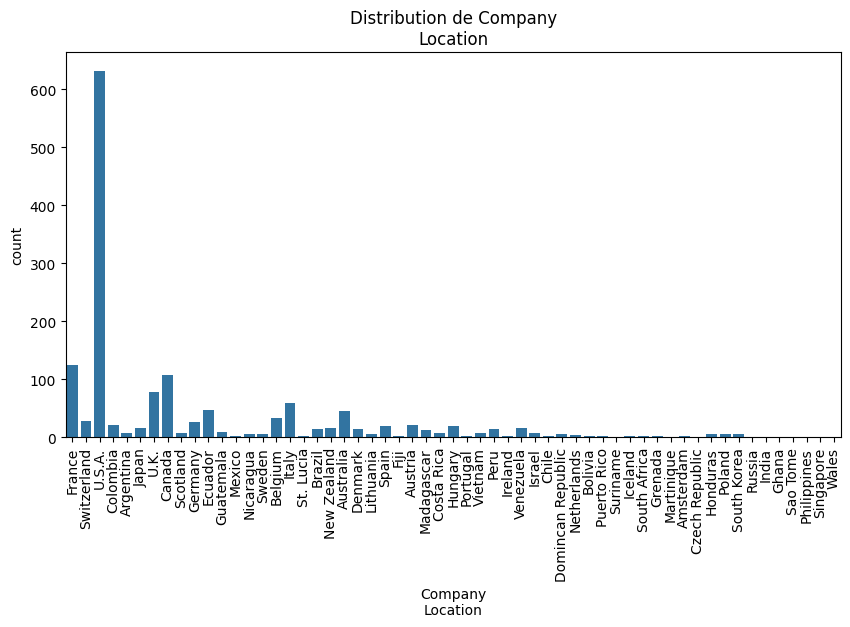

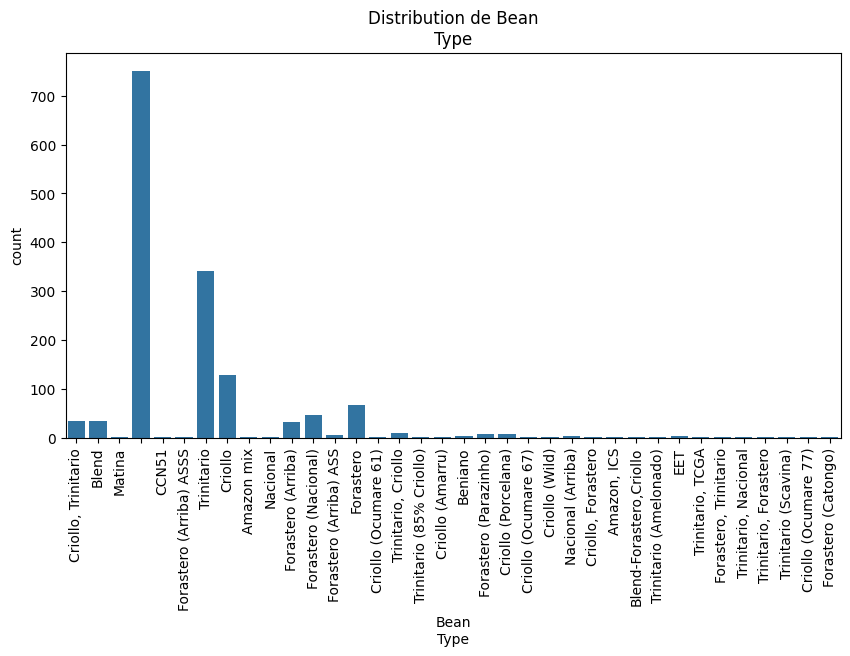

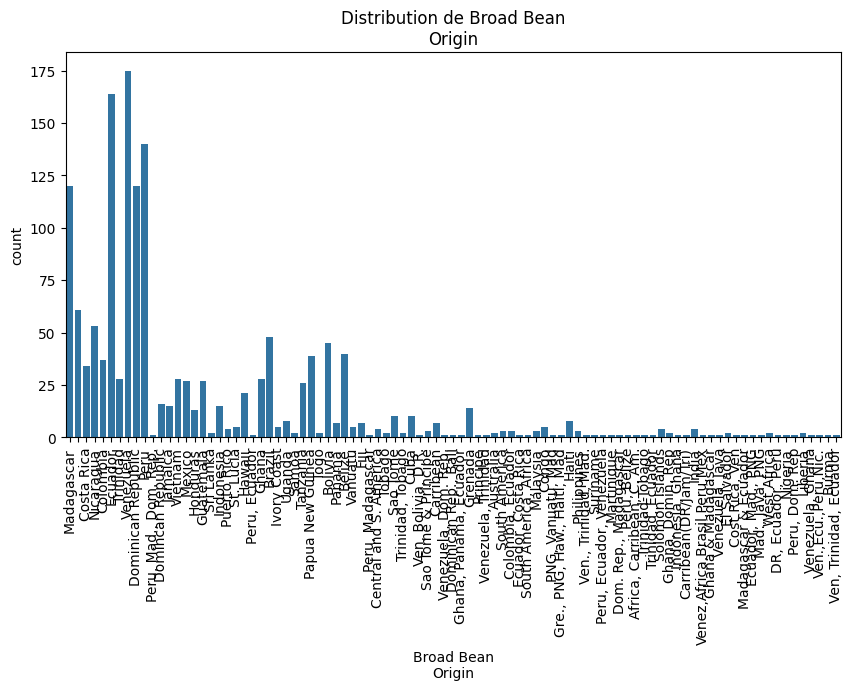

In [13]:
# Affichage des distributions des variables catégorielles
for column in df.columns:
    # Vérifier si la colonne est catégorielle
    if pd.api.types.is_object_dtype(df[column]):
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, data=df)
        plt.title('Distribution de ' + column)
        plt.xticks(rotation=90)
        plt.show()

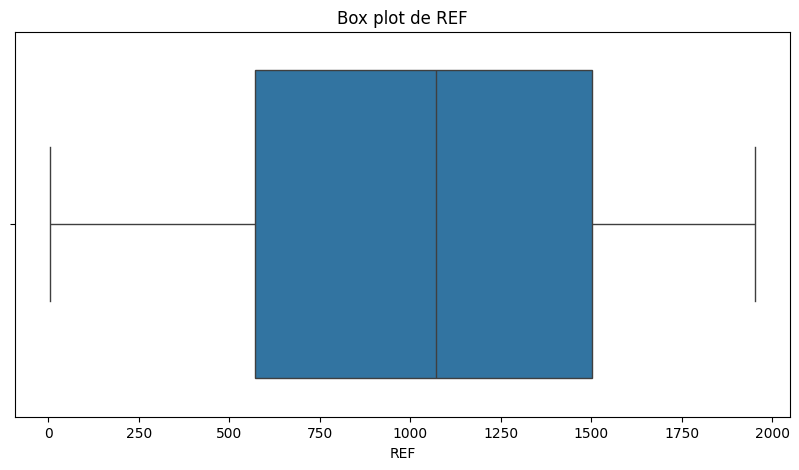

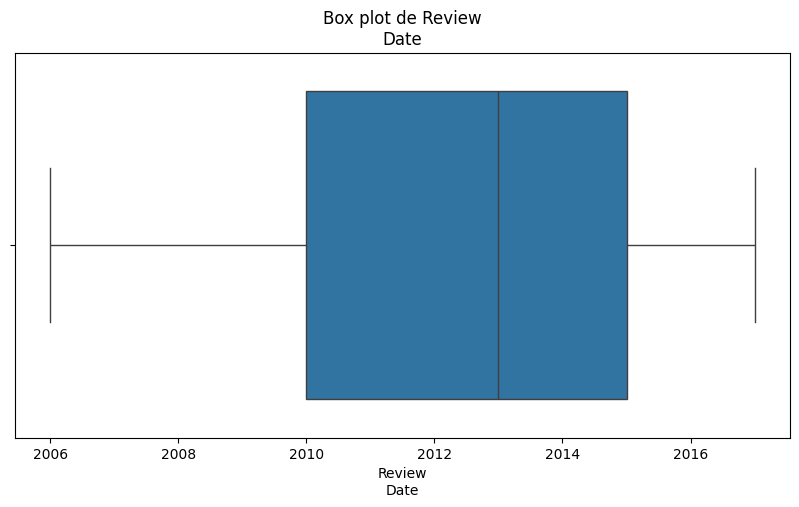

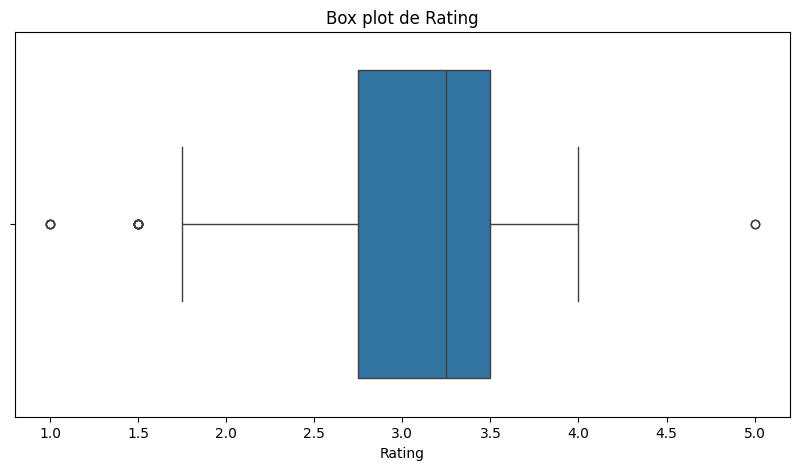

In [14]:
# Boxplot des valeurs numériques, pour les variables categorielle, le refaire
# pour chaques
for column in df.columns:
    # Vérifier si la colonne est numérique
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title('Box plot de ' + column)
        plt.show()

<Axes: xlabel='Review\nDate', ylabel='Rating'>

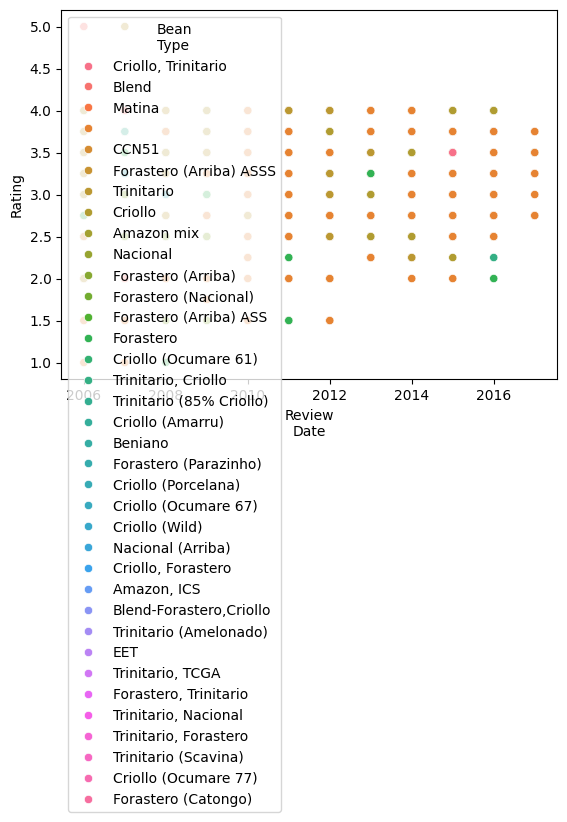

In [15]:
# Graphique nuage de points en faisant le rapport les note et l'origine des fèves de cacao suivant les ans
sns.scatterplot(x=df['Review\nDate'], y=df['Rating'], hue=df['Bean\nType'], data=df)

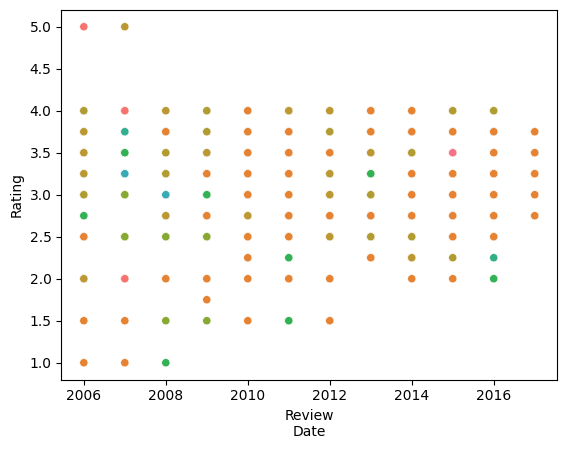

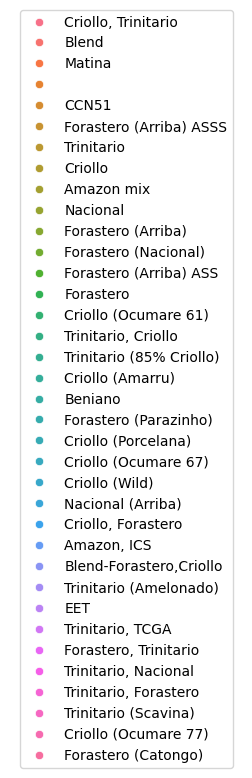

In [16]:
# Le graphique précédent posait un problème avec la légende qui prenait
# trop de place, nous avons reconstruit le graphe en supprimant la legende
# et on l'a transféré dans une fenêtre séparée Matplotlib

import matplotlib.patches as mpatches

# Créer le nuage de points
scatter = sns.scatterplot(x=df['Review\nDate'], y=df['Rating'], hue=df['Bean\nType'], data=df)
scatter.legend_.remove()

# Récupérer les couleurs et les labels de la légende
legend_labels, _= scatter.get_legend_handles_labels()

# Créer une nouvelle figure pour la légende
legend_fig = plt.figure(figsize=(3, 2))
legend_ax = legend_fig.add_subplot(111)

# Ajouter la légende à la nouvelle figure
legend_ax.legend(legend_labels, df['Bean\nType'].unique(), loc='center')

# Supprimer les axes de la figure de la légende
legend_ax.axis('off')

# Afficher la figure de la légende
legend_fig.show()

In [18]:
# Calcul d'une classification prédisant les notes de dégustations en fonction du pourcentage de cacao
# la variable Note est déjà en format numérique, il faudra convertir la variable pourcentage de cacao en nombre
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1500 non-null   object 
 1   Specific Bean Origin
or Bar Name  1500 non-null   object 
 2   REF                               1500 non-null   int64  
 3   Review
Date                       1500 non-null   int64  
 4   Cocoa
Percent                     1500 non-null   object 
 5   Company
Location                  1500 non-null   object 
 6   Rating                            1500 non-null   float64
 7   Bean
Type                         1500 non-null   object 
 8   Broad Bean
Origin                 1500 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


In [19]:
df['Cocoa\nPercent'] = df['Cocoa\nPercent'].str.replace('%', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1500 non-null   object 
 1   Specific Bean Origin
or Bar Name  1500 non-null   object 
 2   REF                               1500 non-null   int64  
 3   Review
Date                       1500 non-null   int64  
 4   Cocoa
Percent                     1500 non-null   float64
 5   Company
Location                  1500 non-null   object 
 6   Rating                            1500 non-null   float64
 7   Bean
Type                         1500 non-null   object 
 8   Broad Bean
Origin                 1500 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 105.6+ KB


In [51]:
# Transformer les notes d'évaluation en catégories et créer une nouvelle variable catégorielle

df['notes_categorie'] = pd.cut(df['Rating'], bins=[0, 2.5, 3.5, 4], labels=['faible', 'moyen', 'élevé'])


In [57]:
# Vérification

df['notes_categorie'].isna().sum()

2

In [58]:
# La variable Note catégorie contient des valeur manquantes, il faut les remplacer
# Calculer le mode
mode = df['notes_categorie'].mode()[0]

# Remplacer les valeurs manquantes par le mode
df['notes_categorie'] = df['notes_categorie'].fillna(mode)

In [59]:
# Importation des bibliothèques Scikit learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [60]:
# Définition de la variable cible y et x la variable explicative

X = df['Cocoa\nPercent'].values.reshape(-1,1)
y = df['notes_categorie']

In [61]:
# Diviser les données en ensemble d'entraînement et de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
# Effectuer la régression logistique

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [63]:
# Prédire sur l'ensemble de test

y_pred = classifier.predict(X_test)

In [64]:
# Afficher les métriques d'évaluation

print('Précision :', metrics.accuracy_score(y_test, y_pred))

Précision : 0.7366666666666667


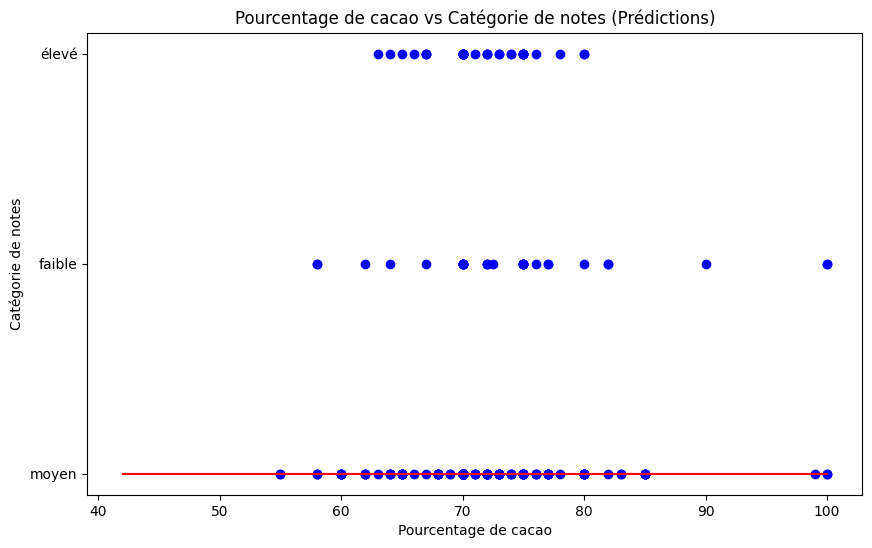

In [65]:
import numpy as np

# Créer un graphique de nuages de points pour les prédictions
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue')

# Créer une gamme de valeurs pour le pourcentage de cacao
cacao_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Prédire sur cette gamme de valeurs
predictions = classifier.predict(cacao_range)

# Tracer la frontière de décision
plt.plot(cacao_range, predictions, color='red')

plt.title('Pourcentage de cacao vs Catégorie de notes (Prédictions)')
plt.xlabel('Pourcentage de cacao')
plt.ylabel('Catégorie de notes')
plt.show()